In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd 
import numpy as np 
import os
import re

In [2]:
df= pd.read_excel("fine.xlsx")
df.head()

,LABEL,cleaned
0,EP,You are very beautiful
1,EP,Nice
2,EP,Nice video jitu bhai
3,EP,Super
4,EP,Supar comedy


In [3]:
#df_languages.columns = ['LABEL', 'COMMENT']
#print(df_languages.isnull().any())
#display(df_languages.head(10))

In [4]:
df.shape

(6341, 2)

In [5]:
X = df['cleaned'].values
Y = df['LABEL'].values


In [6]:
unique, counts = np.unique(Y, return_counts=True)
counts = (counts/6268) * 100
dict(zip(unique, counts))

{'EM': 0.3190810465858328,
 'EP': 38.28972559029994,
 'GM': 39.24696873005743,
 'GP': 11.949585194639438,
 'HM': 5.216975111678367,
 'HP': 1.0210593490746651,
 'OT': 5.121250797702617}

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [8]:
# Make Machine Learning Pipeline contain TfidfVectorizer and Model
from sklearn.neighbors import KNeighborsClassifier
tfidf_vect = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
model = KNeighborsClassifier(n_neighbors=50)
text_clf = Pipeline([('tfidf', tfidf_vect),
                    ('clf', model),])

In [9]:
# Train model using pipeline
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

In [10]:
# Make predictions on unseen test data with trained classifier
predictions = text_clf.predict(X_test)
predictions

array(['EP', 'GM', 'GP', ..., 'EP', 'EP', 'GM'], dtype=object)

In [11]:
# Measure accuracy
accuracy_score(y_test,predictions)

0.8504538939321548

In [12]:
# alternate train and test set through cross validation to yield a more trustworthy accuracy
scores = cross_val_score(text_clf, X, Y, cv=5)
print("Mean cross-validation accuracy: " + str(scores.mean()))

Mean cross-validation accuracy: 0.8476537078053958


In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          EM       0.00      0.00      0.00         3
          EP       0.86      0.91      0.88       808
          GM       0.80      0.86      0.83       804
          GP       0.98      1.00      0.99       258
          HM       0.67      0.04      0.07       106
          HP       0.70      0.95      0.81        20
          OT       1.00      0.78      0.87        94

    accuracy                           0.85      2093
   macro avg       0.72      0.65      0.64      2093
weighted avg       0.84      0.85      0.83      2093



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Li Confusion Matrix of KNN')

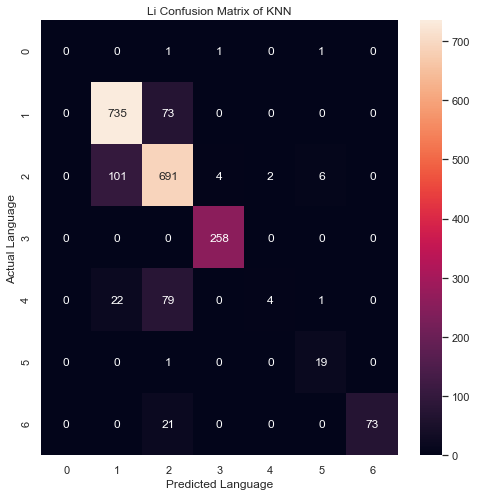

In [14]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cm, annot = True, fmt = "d")

ax.set_xlabel('Predicted Language')
ax.set_ylabel('Actual Language')
ax.set_title('Li Confusion Matrix of KNN')

In [15]:
txt= ['congresh ni ak दीधी',
      'maru name kazi zuber chhe',
      'nice ho',
      'mera name kya he',
      'ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜']

pred = text_clf.predict(txt)
for i in pred :
        print(i)



GM
GM
EP
GM
OT
